# Bike Sharing (Boombikes) 

In [264]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [265]:
import numpy as np
import pandas as pd

## 1. Reading & Understanding the data

#### 1.1 Importing the input files

In [266]:
day = pd.read_csv("day.csv")

In [267]:
# Check the head of the dataset
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### 1.2 Inspect Data Frame

In [268]:
day.shape

(730, 16)

In [269]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [270]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [271]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1.3. Data Preparation

In [272]:
# List of variables to map
data = day[['season', 'weathersit']]


# Mapping dictionaries
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Apply mapping
data['season'] = [season_mapping[x] for x in data['season']]
data['weathersit'] = [weathersit_mapping[x] for x in data['weathersit']]

print(data)

     season                        weathersit
0    spring                     Mist + Cloudy
1    spring                     Mist + Cloudy
2    spring  Clear, Few clouds, Partly cloudy
3    spring  Clear, Few clouds, Partly cloudy
4    spring  Clear, Few clouds, Partly cloudy
..      ...                               ...
725  spring                     Mist + Cloudy
726  spring                     Mist + Cloudy
727  spring                     Mist + Cloudy
728  spring  Clear, Few clouds, Partly cloudy
729  spring                     Mist + Cloudy

[730 rows x 2 columns]


In [273]:
# Drop 'season', 'weathersit' as we have created the dummies for it
day.drop(['season', 'weathersit'], axis=1, inplace=True)

In [274]:
# Add the results to the original housing dataframe

day = pd.concat([day, data], axis = 1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season,weathersit
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist + Cloudy
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist + Cloudy
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,"Clear, Few clouds, Partly cloudy"
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,"Clear, Few clouds, Partly cloudy"
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,"Clear, Few clouds, Partly cloudy"


## 2. Data Analisis (EDA)

#### 2.1. Univariate Analysis

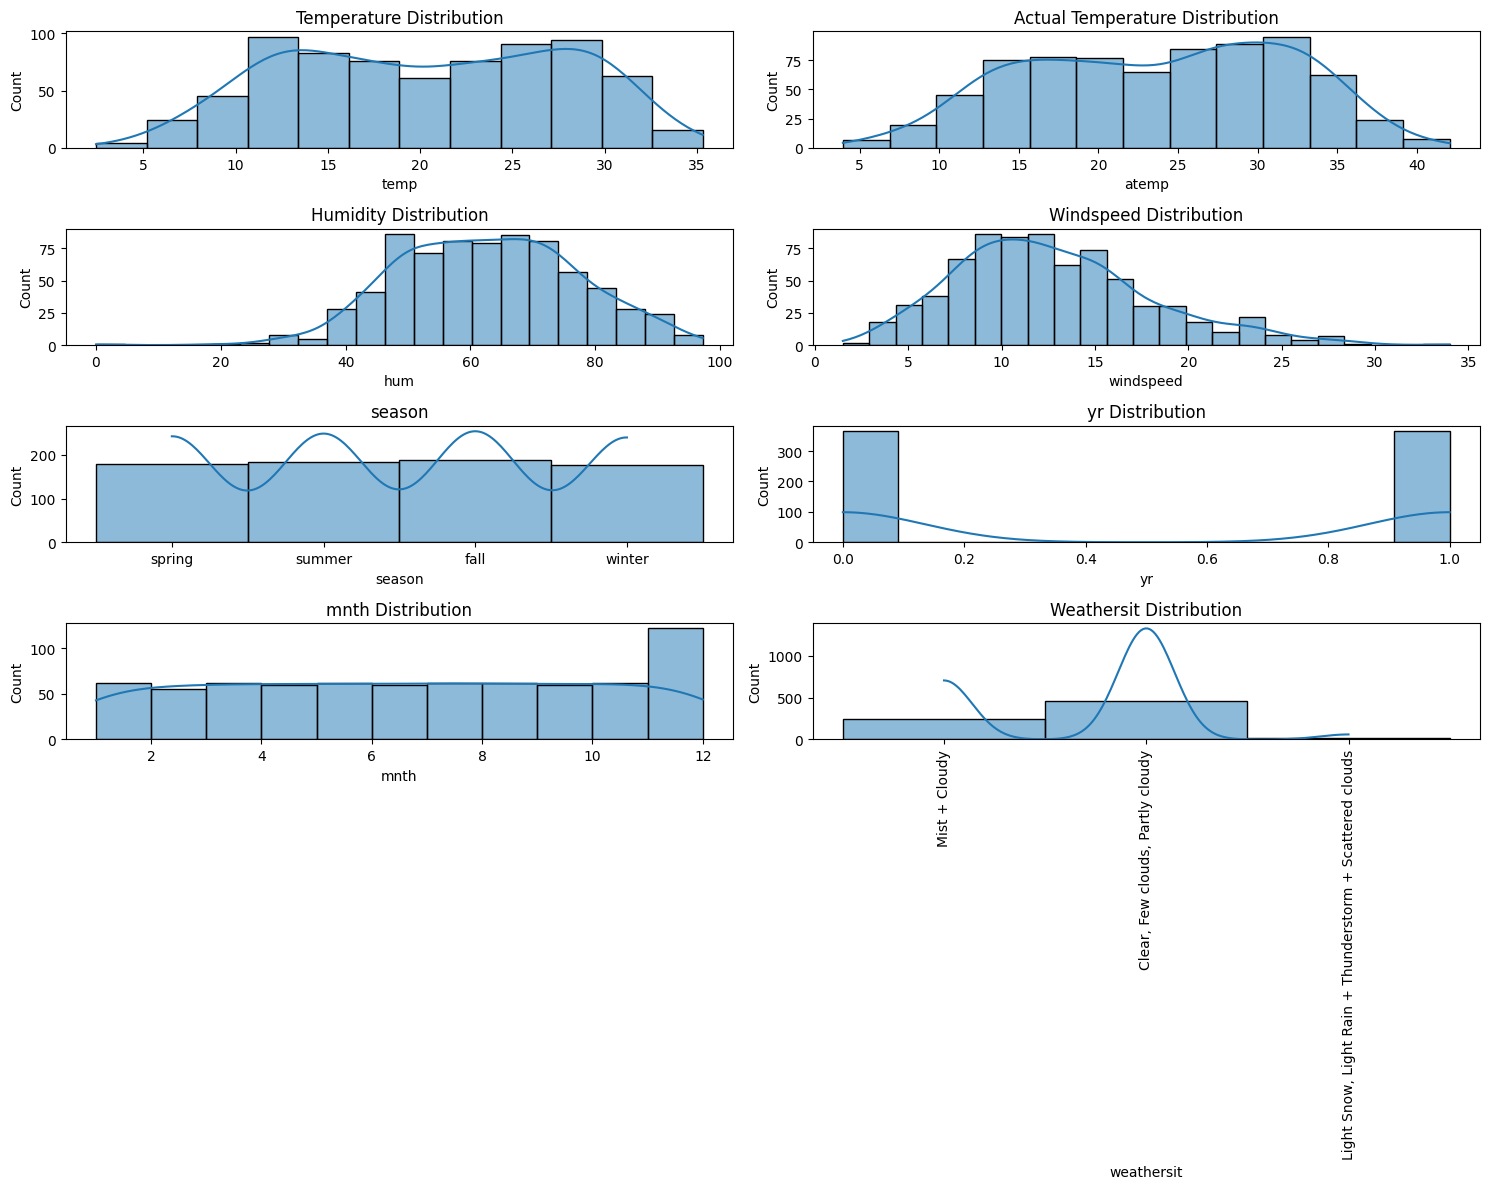

In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
sns.histplot(day['temp'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(day['atemp'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Actual Temperature Distribution')

sns.histplot(day['hum'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Humidity Distribution')

sns.histplot(day['windspeed'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Windspeed Distribution')

sns.histplot(day['season'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('season')

sns.histplot(day['yr'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('yr Distribution')

sns.histplot(day['mnth'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('mnth Distribution')

sns.histplot(day['weathersit'], kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Weathersit Distribution')
axes[3, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Temp - Demand is high when the tempature is between 10 to 15 & 25 to 30.<br>
Hum - Demand is high when the humidity is between 50 to 70.<br>
Windspeed - Demand is high when the Windspeed is less between 9 to 12.<br>
Season - Demand is almost equal in all seasons.<br>
Mnth - Demand is high during month of December.<br>
Weather - Demand is high when the weather is 'Clear, Few clouds, Partly cloudy'.<br> </div>

#### 2.2. Bivariate Analysis

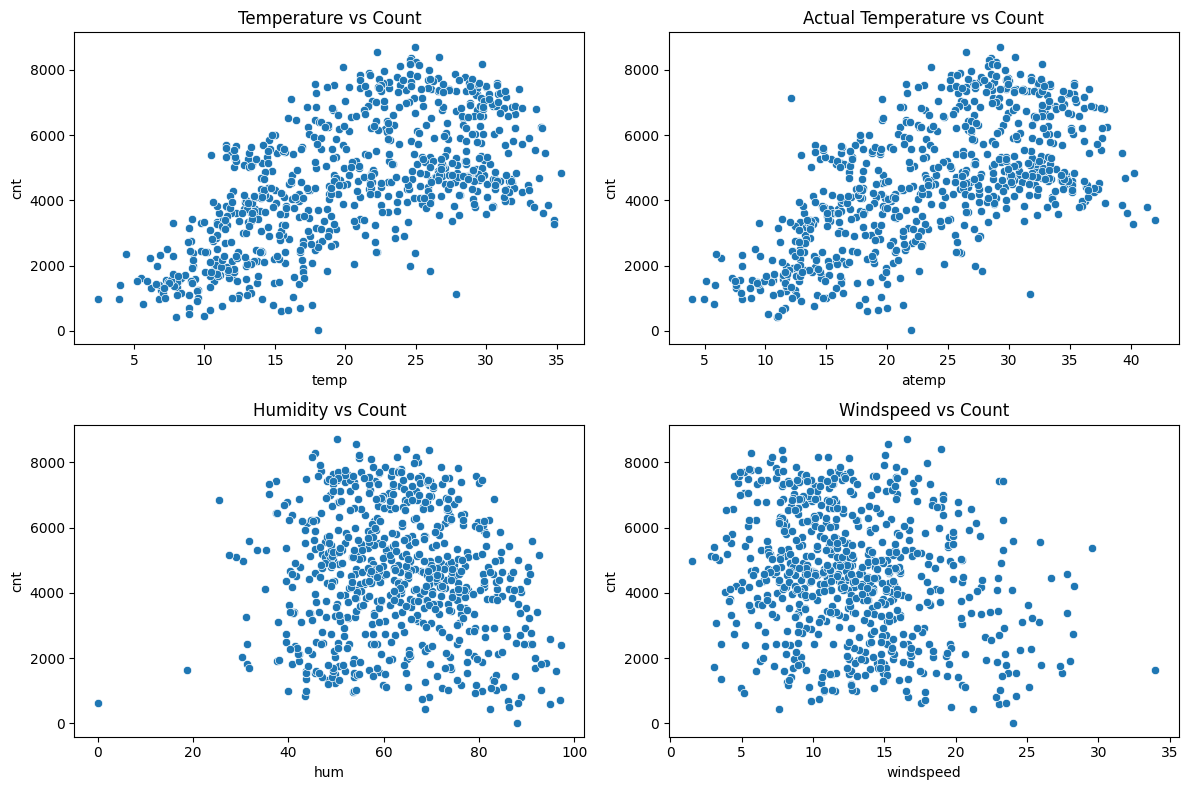

In [276]:
# Bivariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(data=day, x='temp', y='cnt', ax=axes[0, 0])
axes[0, 0].set_title('Temperature vs Count')

sns.scatterplot(data=day, x='atemp', y='cnt', ax=axes[0, 1])
axes[0, 1].set_title('Actual Temperature vs Count')

sns.scatterplot(data=day, x='hum', y='cnt', ax=axes[1, 0])
axes[1, 0].set_title('Humidity vs Count')

sns.scatterplot(data=day, x='windspeed', y='cnt', ax=axes[1, 1])
axes[1, 1].set_title('Windspeed vs Count')

plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Temperature is co-related with target variable 'cnt'.
<br> </div>

## 3. Data Visualization

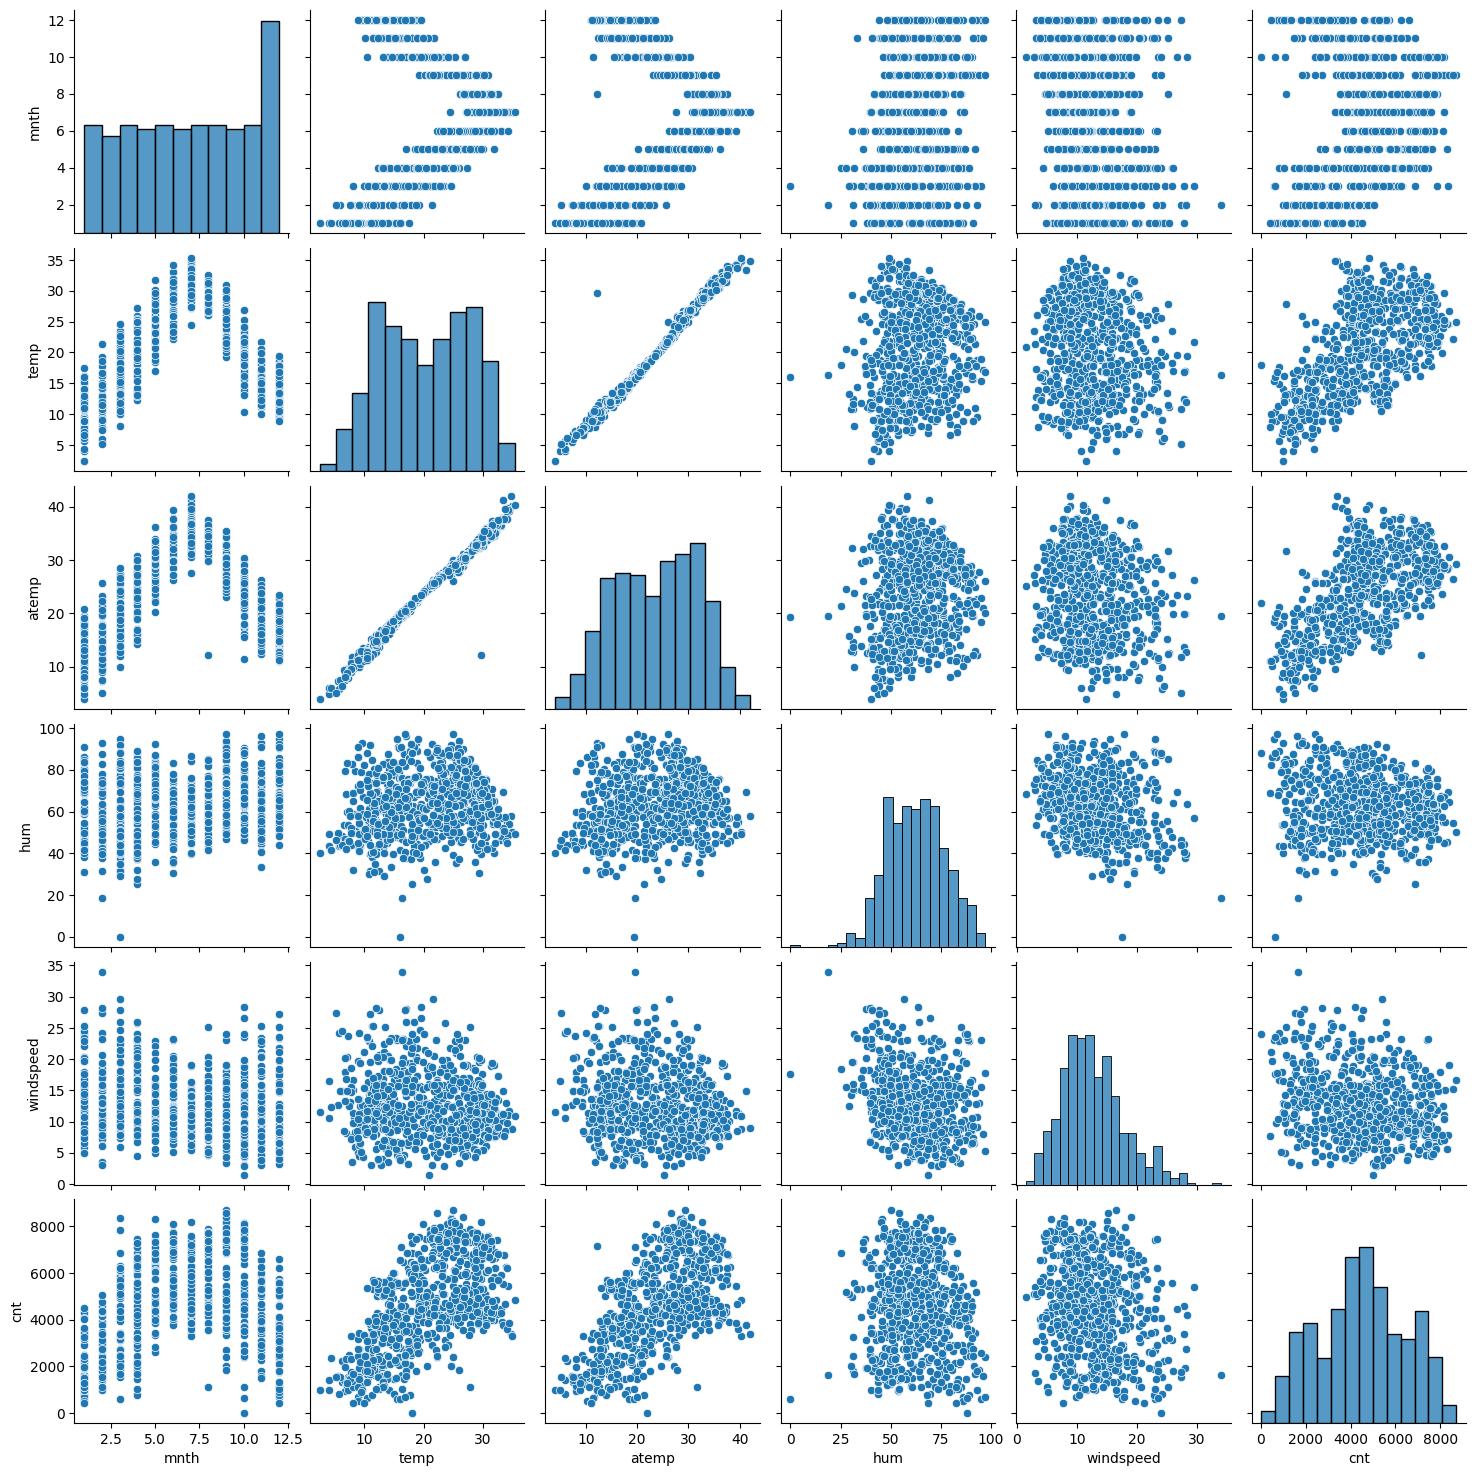

In [277]:
# Plotting pair-plot
sns.pairplot(day, vars=['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()


## 4. Dummy Variables

In [278]:
# Encode categorical variables using one-hot encoding
season_weathersit = pd.get_dummies(day[['season', 'weathersit']], drop_first=True)
season_weathersit

,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
725,True,False,False,False,True
726,True,False,False,False,True
727,True,False,False,False,True
728,True,False,False,False,False


In [279]:
# Add the results to the original day dataframe
day_new = pd.concat([day, season_weathersit], axis = 1)
day_new.head(2)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,season,weathersit,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,331,654,985,spring,Mist + Cloudy,True,False,False,False,True
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,131,670,801,spring,Mist + Cloudy,True,False,False,False,True


In [280]:
# Drop the 'instant', 'dteday', 'weathersit', 'season', 'casual', 'registered' columns as they are not needed for the regression model
# List of columns to drop
columns_to_drop = ['instant', 'dteday', 'weathersit', 'season', 'casual', 'registered']

# Drop the columns if they all exist
if all(col in day_new.columns for col in columns_to_drop):
    day_new.drop(columns=columns_to_drop, inplace=True)

day_new.head(2)


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True


In [281]:
day_new.head(2)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True


In [282]:
day_new.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [283]:
day_new.shape

(730, 15)

## 5. Splitting the Data into Training and Testing Sets

In [284]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# or use below step

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(219, 15)


## 6. Rescaling the Features 
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [286]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp',	'hum',	'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,0.0,0.0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,0.0,0.0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,0.0,1.0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,0.0,0.0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,0.0,1.0


In [287]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### 7. Visualising Train dataset

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

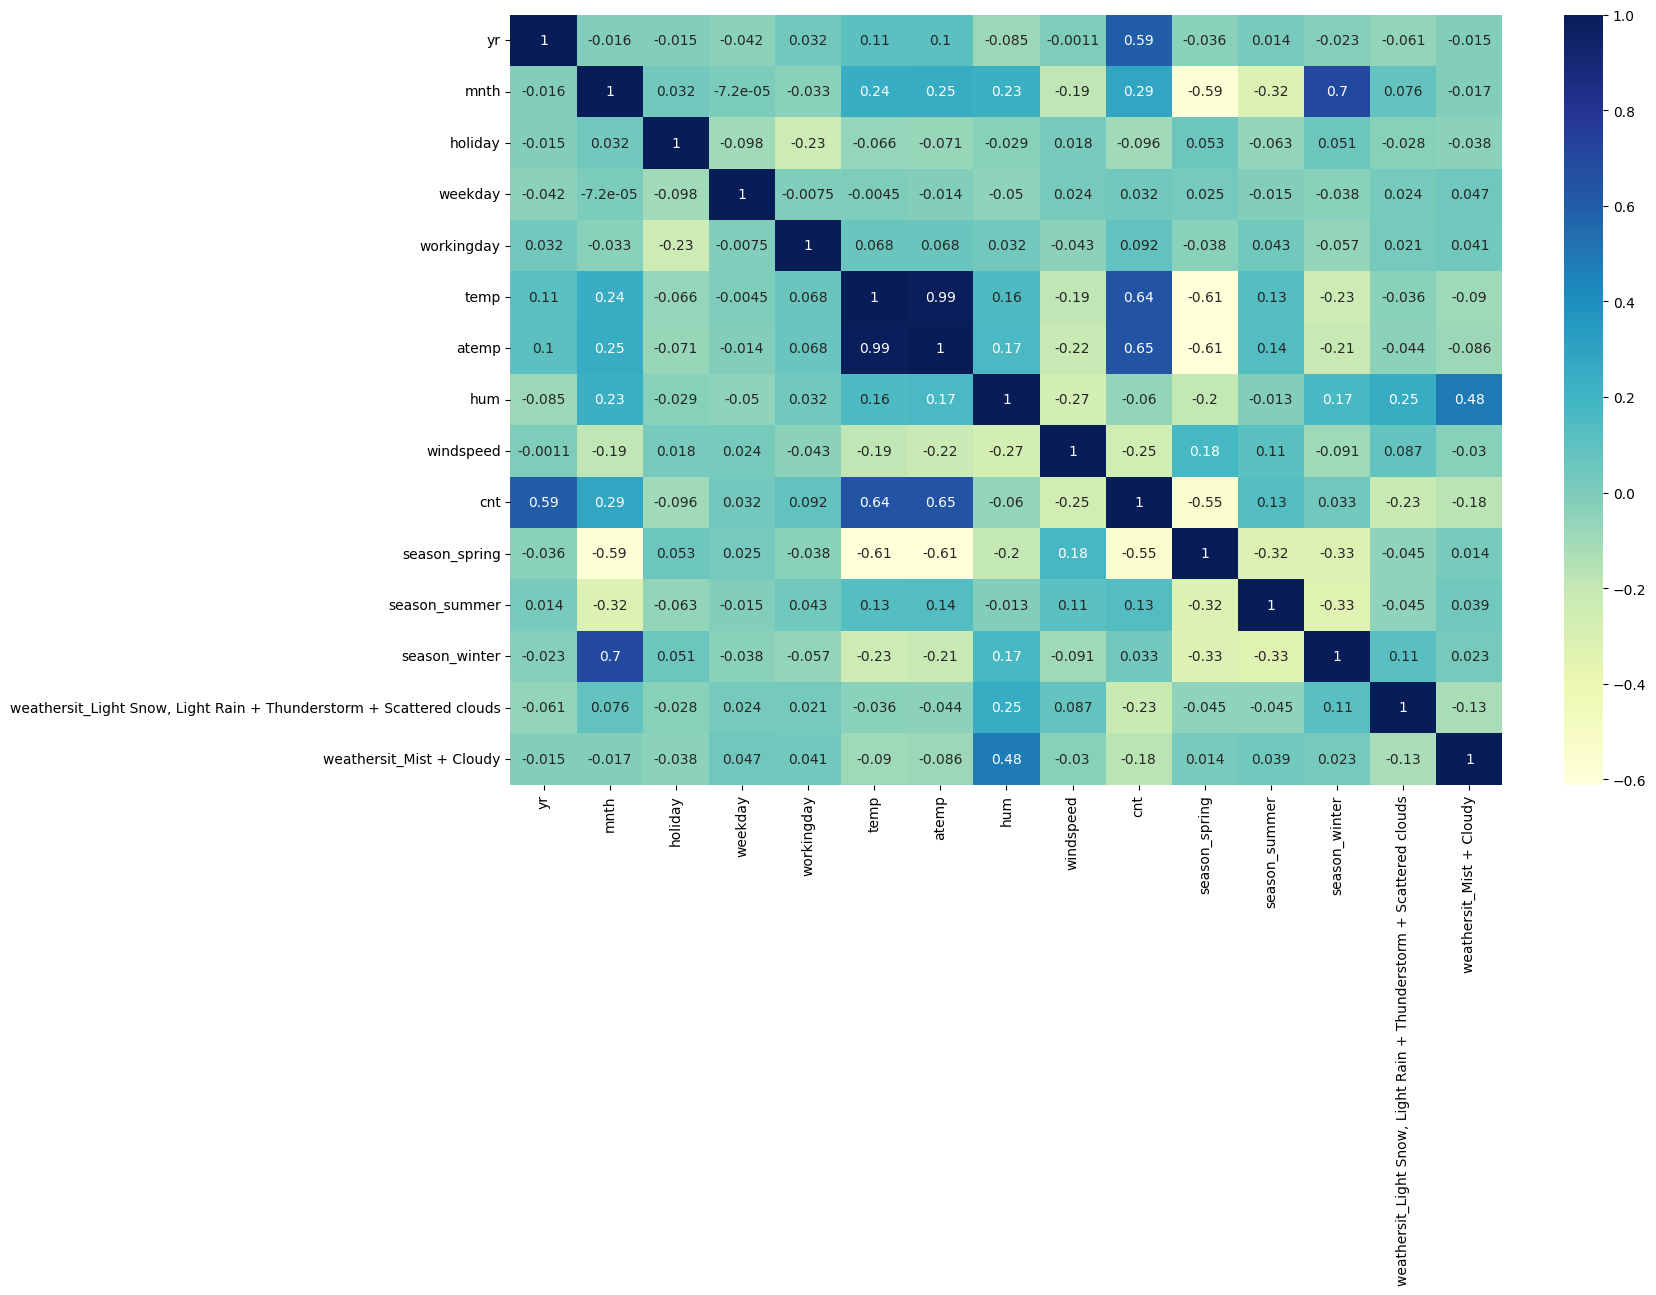

In [289]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

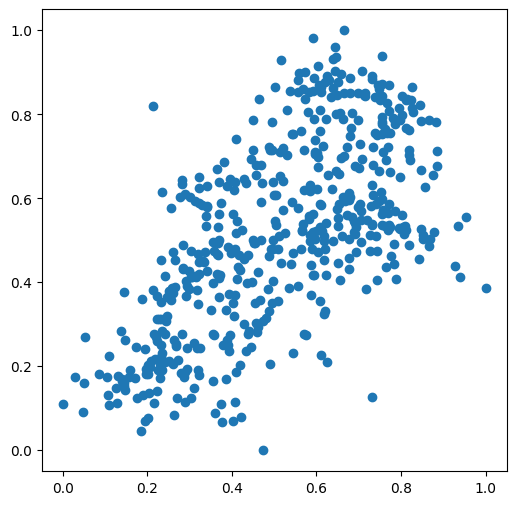

In [290]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

## 8. Dividing into X and Y sets for the model building

In [291]:
# Define features (X) and target variable (y)
y_train = df_train.pop('cnt')
X_train = df_train

## 9. Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [292]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [293]:
# Running RFE with the output number of the variable equal to 12

# Initialize the linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Running RFE with the output number of variables equal to 12
rfe = RFE(estimator=lm, n_features_to_select=12)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the ranking of the features
#print(rfe.ranking_)



In [294]:
# Get the features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('mnth', np.False_, np.int64(3)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(2)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
  np.True_,
  np.int64(1)),
 ('weathersit_Mist + Cloudy', np.True_, np.int64(1))]

In [295]:
# Selected 12 columns by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [296]:
# removed 2 columns by RFE
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday'], dtype='object')

#### 9.1. Building model using statsmodel, for the detailed statistics

In [297]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [298]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [299]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [300]:
lm.params

const                                                                  0.259895
yr                                                                     0.232404
holiday                                                               -0.076346
weekday                                                                0.048043
temp                                                                   0.438631
atemp                                                                  0.058973
hum                                                                   -0.125278
windspeed                                                             -0.180003
season_spring                                                         -0.075459
season_summer                                                          0.042460
season_winter                                                          0.088185
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds   -0.246652
weathersit_Mist + Cloudy                

In [301]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          7.57e-184
Time:                        22:54:42   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

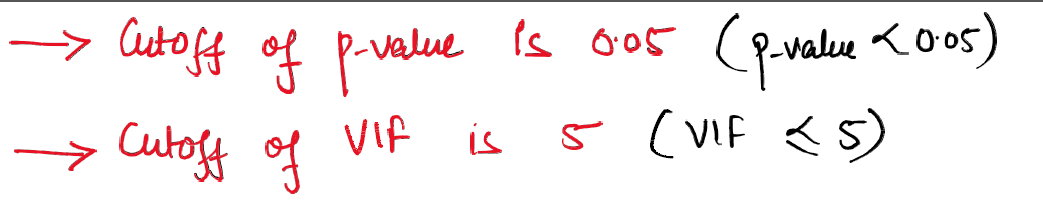

p-value of `atemp`> 0.05; can be dropped

In [302]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

Rebuilding the model without `atemp`

In [303]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [304]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [305]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.38e-185
Time:                        22:54:42   Log-Likelihood:                 493.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     498   BIC:                            -912.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [306]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'weekday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [307]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [308]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.07
3,temp,15.34
5,windspeed,4.68
6,season_spring,3.83
2,weekday,3.11
8,season_winter,3.09
10,weathersit_Mist + Cloudy,2.28
7,season_summer,2.25
0,yr,2.08
9,"weathersit_Light Snow, Light Rain + Thundersto...",1.24


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `hum` has a significantly high VIF (`27.07`). Hence, this variable isn't of much use and should be dropped.

In [309]:
# Dropping highly correlated variables and insignificant variables
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [310]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new1)

In [311]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_lm1).fit() 

In [312]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.40e-184
Time:                        22:54:42   Log-Likelihood:                 488.39
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     499   BIC:                            -908.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [313]:
X_train_new1.columns

Index(['yr', 'holiday', 'weekday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [314]:
#X_train_new1 = X_train_new1.drop(['const'], axis=1)

In [315]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
5,season_spring,2.12
0,yr,2.07
6,season_summer,1.81
7,season_winter,1.68
9,weathersit_Mist + Cloudy,1.54
8,"weathersit_Light Snow, Light Rain + Thundersto...",1.08
1,holiday,1.05


## 10. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [316]:
y_train_pred = lm1.predict(X_train_lm1)

In [317]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#meaddition -  we already know
r_squared1 = r2_score(y_train, y_train_pred)
r_squared1

0.8286851996149827

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
r_squared on Train Dataset is 82.8%.

In [318]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

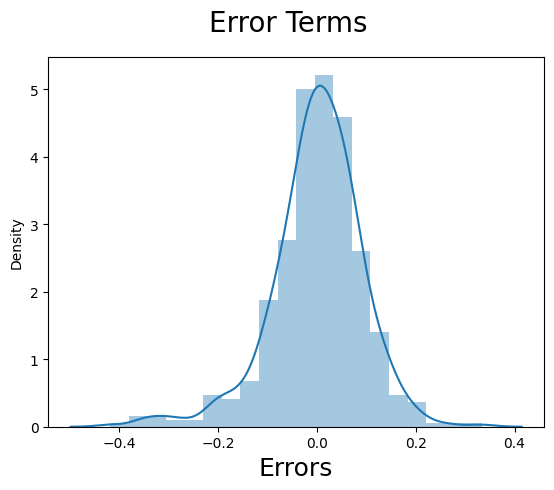

In [319]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 11. Making Predictions on Test Dataset

#### 11.1. Applying the scaling on the test sets

In [320]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp',	'hum',	'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds',
       'weathersit_Mist + Cloudy']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds",weathersit_Mist + Cloudy
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,0.0,0.0,1.0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,1.0,0.0,0.0,0.0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,1.0,0.0,1.0
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,0.0,0.0,0.0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,1.0,0.0,0.0,0.0


#### 11.2. Dividing into X_test and y_test

In [321]:
y_test = df_test.pop('cnt')
X_test = df_test

In [322]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]
X_test_new.shape


(219, 10)

In [323]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [324]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

In [325]:
y_test_pred.head()

184    0.424472
535    0.893201
299    0.416947
221    0.580105
152    0.566681
dtype: float64

## 13. Evaluate the model , r-squared, on the test

In [326]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [327]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8058777271560256

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
r_squared on Test Dataset is 80.5% (very close to Train dataset 82.8%).

#### 13.1. Model Evaluation

Text(0, 0.5, 'y_pred')

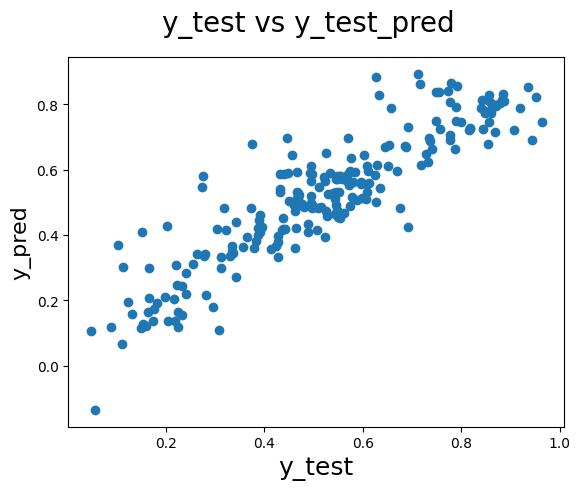

In [328]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

<div style="background-color: lightblue; padding: 10px; color: black">
Insight:<br>
Prediction on Test dataset has same linear graph representation as similar to Train dataset.